<a href="https://colab.research.google.com/github/SanaSahar/brain-tumor-detection/blob/main/Brain_Tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
sartajbhuvaji_brain_tumor_classification_mri_path = kagglehub.dataset_download('sartajbhuvaji/brain-tumor-classification-mri')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [ ]:
!pip install tensorflow
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 596.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
!pip install opencv-python
from sklearn.utils import shuffle
import tensorflow as tf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.3 MB/s eta 0:00:00


Folder Path

In [ ]:
import os
import cv2
import numpy as np

X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# Load training data
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)


for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)



In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

Train test split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in Y_train:
    y_train_new.append(labels.index(i))
    Y_train=y_train_new
    Y_train = tf.keras.utils.to_categorical(Y_train)

y_test_new = []
for i in Y_test:
    y_test_new.append(labels.index(i))
    Y_test=y_train_new
    Y_test = tf.keras.utils.to_categorical(Y_test)

Convolutional Neural Network

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,452 (9.25 MB)

 Trainable params: 2,424,452 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 970ms/step - accuracy: 0.3933 - loss: 25.8667 - val_accuracy: 0.6259 - val_loss: 0.9068
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 78s 940ms/step - accuracy: 0.6201 - loss: 0.9149 - val_accuracy: 0.7551 - val_loss: 0.7625
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 80s 960ms/step - accuracy: 0.7036 - loss: 0.6919 - val_accuracy: 0.8163 - val_loss: 0.7707
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 78s 935ms/step - accuracy: 0.7721 - loss: 0.5845 - val_accuracy: 0.8367 - val_loss: 0.5860
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 81s 970ms/step - accuracy: 0.8079 - loss: 0.4943 - val_accuracy: 0.8401 - val_loss: 0.7618
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 80s 964ms/step - accuracy: 0.8724 - loss: 0.3915 - val_accuracy: 0.8503 - val_loss: 0.6588
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 78s 942ms/step - accuracy: 0.8848 - loss: 0.3317 - val_accuracy: 0.8571 - val_loss: 0.7850
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 79s 953ms/step - accuracy: 0.9043 - loss: 0.2643 - val_acc

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4473 - loss: 1.2166 - val_accuracy: 0.6795 - val_loss: 0.7758
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.6836 - loss: 0.7773 - val_accuracy: 0.6757 - val_loss: 0.7277
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7441 - loss: 0.6042 - val_accuracy: 0.7915 - val_loss: 0.5774
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8390 - loss: 0.4442 - val_accuracy: 0.8069 - val_loss: 0.4752
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8622 - loss: 0.3349 - val_accuracy: 0.8301 - val_loss: 0.4704
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9039 - loss: 0.2609 - val_accuracy: 0.8417 - val_loss: 0.4292
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9233 - loss: 0.2139 - val_accuracy: 0.8764 - val_loss: 0.4060
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9334 - loss: 0.1769 - val_accuracy: 0.8842 - val_loss:

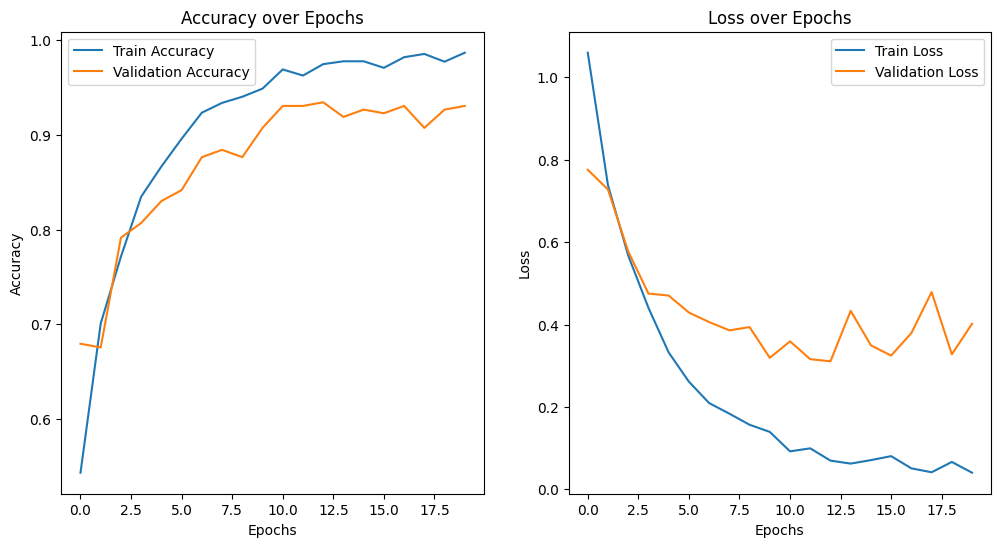

In [ ]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define image size and labels
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Initialize data arrays
X = []
Y = []

# Load and preprocess images
for label in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training', label)
    for file in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, file))
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))  # Resize images to 150x150
            X.append(img)
            Y.append(label)

# Convert X and Y to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Normalize the image data (scale pixel values to [0, 1])
X = X / 255.0

# Encode labels into integers (0, 1, 2, 3 for the 4 classes)
le = LabelEncoder()
Y = le.fit_transform(Y)

# Split the dataset into training and testing sets (90% training, 10% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=101)

# Build the CNN model
model = Sequential()

# Add first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer (Dense layer)
model.add(Dense(128, activation='relu'))

# Add dropout layer to avoid overfitting
model.add(Dropout(0.5))

# Output layer with softmax activation for multi-class classification
model.add(Dense(4, activation='softmax'))

# Compile the model (use Adam optimizer and categorical crossentropy loss)
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (use 20 epochs and 10% of data for validation)
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the model for future use
model.save('brain_tumor_classifier.h5')


In [ ]:
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(23).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

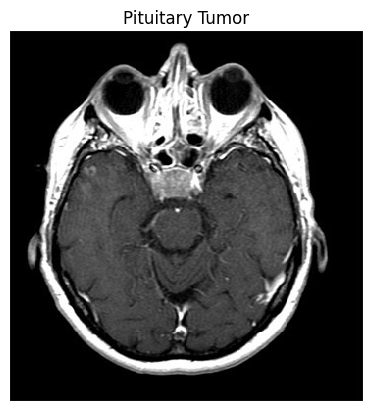

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load image
img_path = '/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(23).jpg'
img = image.load_img(img_path)

# Display the image
plt.imshow(img, interpolation='nearest')
plt.title("Pituitary Tumor")  # Optional title
plt.axis('off')               # Hide axis ticks
plt.show()
